In [1]:
import pandas as pd
a=pd.read_table("/home/jash/Desktop/petplan/Profitability1.txt", sep='|', lineterminator='\n', error_bad_lines=False)

Skipping line 267909: expected 33 fields, saw 34

Skipping line 299539: expected 33 fields, saw 34

/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
data=pd.DataFrame(data=a,index=None)
data = data.sample(frac=1).reset_index(drop=True)
import math
import numpy as np
data['LossRatio'].fillna(0, inplace=True)
data['L']=0
data.loc[data['LossRatio'] >.57, 'L'] = 1
data.to_csv("/home/jash/Desktop/petplan/Profitability.csv")
Y=data['L']
y=pd.DataFrame(Y)
x=pd.DataFrame(data)


In [3]:
x.drop(['LossRatio'],axis=1,inplace=True)
x.drop(['CustomerNumber','PhoneNumber','Surname','GivenName','CustomerMailingAddr_Addr1','CustomerMailingAddr_City','CustomerMailingAddr_StateProvCd',
       'CustomerMailingAddr_PostalCode','PetId','StartDate','EndDate','LastPolicyRef'],axis=1,inplace=True)

p=pd.DataFrame(x)
p.drop(p.index[334476],inplace=True)
y.drop(y.index[334476],inplace=True)
p['TotalClaimsAmtPaid'].fillna(0, inplace=True)

In [4]:
p.isnull().sum()

Duration                       0
TotalClaimsAmtPaid             0
TotalEarnedPremium             0
BreedName                     86
Currentage                     1
CopayPct                       0
Deductible                     0
PetType                        0
PolicyForm                     0
CarrierCd                      0
ClaimNumber               296354
ClaimAmount               296354
ClaimDetails              296354
ConditionGrp              296354
Claimcodecategory         296354
Severity                  296652
Country                      389
Quadrant                       0
claimdurationInception    296354
churn\r                        0
L                              0
dtype: int64

In [5]:
p.drop(['ClaimNumber','ClaimAmount','Severity','ClaimDetails','ConditionGrp','Claimcodecategory','claimdurationInception'],axis=1,inplace=True)

In [6]:
p.isnull().sum()

Duration                0
TotalClaimsAmtPaid      0
TotalEarnedPremium      0
BreedName              86
Currentage              1
CopayPct                0
Deductible              0
PetType                 0
PolicyForm              0
CarrierCd               0
Country               389
Quadrant                0
churn\r                 0
L                       0
dtype: int64

In [7]:
p.drop(['Quadrant'],axis=1,inplace=True)

In [8]:
p.dropna(how='any',inplace=True)

In [9]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
h2o.init()
df = h2o.H2OFrame(p)
y = 'L'
x=df.col_names
print df
x.remove(y)
df[y] = df[y].asfactor()
train, valid, test = df.split_frame(ratios=[.8,.1])
from h2o.estimators.gbm import H2OGradientBoostingEstimator
gbm_cv3 = H2OGradientBoostingEstimator(nfolds=3)
gbm_cv3.train(x=x, y=y, training_frame=train)
## Getting all cross validated models 
all_models = gbm_cv3.cross_validation_models()
print("Total cross validation models: " + str(len(all_models)))

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_121"; OpenJDK Runtime Environment (Zulu 8.20.0.5-linux64) (build 1.8.0_121-b15); OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-linux64) (build 25.121-b15, mixed mode)
  Starting server from /home/jash/anaconda3/envs/py27/h2o_jar/h2o.jar
  Ice root: /tmp/tmpXevmeD
  JVM stdout: /tmp/tmpXevmeD/h2o_jash_started_from_python.out
  JVM stderr: /tmp/tmpXevmeD/h2o_jash_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,4 months and 25 days !!!
H2O cluster name:,H2O_from_python_jash_0c1kr3
H2O cluster total nodes:,1
H2O cluster free memory:,1.714 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/h2o/h2o.py:562: UserWarning: [Lwater.parser.ParseWriter$ParseErr;@310fafaf
  warnings.warn(w)


Parse progress: |█████████████████████████████████████████████████████████| 100%


/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/h2o/job.py:69: UserWarning: ParseError at file upload_ad061eab75e02a171a4ba6e61ea34b6b at line 0 ( destination line 0 )  at byte offset 153; error = 'Unmatched quote char "'
  warnings.warn(w)
/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/h2o/job.py:69: UserWarning: ParseError at file upload_ad061eab75e02a171a4ba6e61ea34b6b at line 2 ( destination line 2 )  at byte offset 159; error = 'Unmatched quote char "'
  warnings.warn(w)


Duration,TotalClaimsAmtPaid,TotalEarnedPremium,BreedName,Currentage,CopayPct,Deductible,PetType,PolicyForm,CarrierCd,Country,churn,L
nan,nan,nan,BreedName,nan,nan,nan,PetType,PolicyForm,CarrierCd,Country,nan,nan
nan,nan,nan,,nan,nan,nan,,,,,nan,nan
265,296.784,365.374,Mastiff Mix,0,0.8,200,Dog,Bronze,ALZ,US,1,1
30,0,0,Mixed Breed Large (71lb +),1,0.8,100,Dog,Introductory,XLC,US,1,0
1256,499.49,1558.91,Mixed Breed Medium (23 - 70lb),5,0.9,350,Dog,15000,XLC,US,0,0
30,0,0,Labrador Mix,0,0.8,100,Dog,Introductory,XLC,US,1,0
30,0,0,Domestic Shorthair,0,0.8,100,Cat,Introductory,CAN,CAN,1,0
949,3470.71,2420.73,Great Dane,2,0.9,300,Dog,Unlimited,XLC,US,0,1
100,0,92.8384,Mixed Breed Medium (23 - 70lb),2,0.8,250,Dog,15000,XLC,US,1,0
226,0,711.12,Boxer,6,0.8,500,Dog,15000,XLC,US,1,0



gbm Model Build progress: |███████████████████████████████████████████████| 100%
Total cross validation models: 3


In [10]:
gbm_cv3.confusion_matrix()
performance = gbm_cv3.model_performance(test_data=test)
print performance



ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.000904551738344
RMSE: 0.0300757666294
LogLoss: 0.00719412672271
Mean Per-Class Error: 0.000761391043228
AUC: 0.999995727573
Gini: 0.999991455145
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.543669914928: 


,0,1,Error,Rate
0,32691.0,13.0,0.0004,(13.0/32704.0)
1,13.0,9749.0,0.0013,(13.0/9762.0)
Total,32704.0,9762.0,0.0006,(26.0/42466.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.5436699,0.9986683,204.0
max f2,0.4584835,0.9988735,216.0
max f0point5,0.6325110,0.9991174,190.0
max accuracy,0.5436699,0.9993877,204.0
max precision,0.9948305,1.0,0.0
max recall,0.0573361,1.0,324.0
max specificity,0.9948305,1.0,0.0
max absolute_mcc,0.5436699,0.9982708,204.0
max min_per_class_accuracy,0.4584835,0.9991805,216.0
max mean_per_class_accuracy,0.4584835,0.9992386,216.0


Gains/Lift Table: Avg response rate: 22.99 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0108793,0.9947898,4.3501332,4.3501332,1.0,1.0,0.0473264,0.0473264,335.0133169,335.0133169
,2,0.0205812,0.9947416,4.3501332,4.3501332,1.0,1.0,0.0422045,0.0895308,335.0133169,335.0133169
,3,0.0372298,0.9947411,4.3501332,4.3501332,1.0,1.0,0.0724237,0.1619545,335.0133169,335.0133169
,4,0.0402911,0.9947176,4.3501332,4.3501332,1.0,1.0,0.0133169,0.1752715,335.0133169,335.0133169
,5,0.0500165,0.9946227,4.3501332,4.3501332,1.0,1.0,0.0423069,0.2175784,335.0133169,335.0133169
,6,0.1000565,0.9940607,4.3501332,4.3501332,1.0,1.0,0.2176808,0.4352592,335.0133169,335.0133169
,7,0.1500024,0.9931490,4.3501332,4.3501332,1.0,1.0,0.2172711,0.6525302,335.0133169,335.0133169
,8,0.2000188,0.9880561,4.3501332,4.3501332,1.0,1.0,0.2175784,0.8701086,335.0133169,335.0133169
,9,0.3000754,0.0019590,1.2981805,3.3324963,0.2984232,0.7660676,0.1298914,1.0,29.8180480,233.2496272
,10,0.8092356,0.0017799,0.0,1.2357340,0.0,0.2840681,0.0,1.0,-100.0,23.5734032


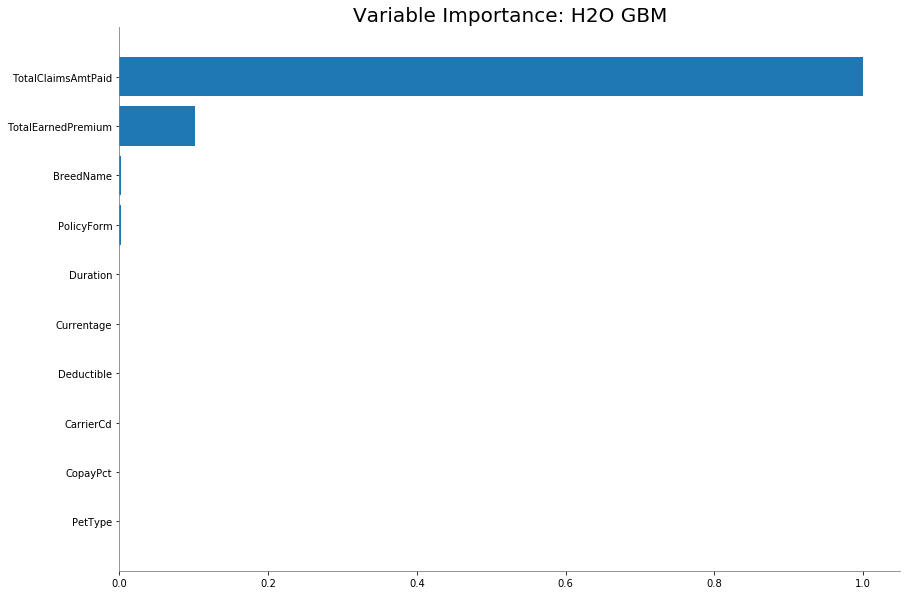

In [12]:
import matplotlib.pyplot as plt
gbm_cv3.varimp_plot()
